In [21]:
%matplotlib notebook
import gmmreg as gR
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt

from __future__ import print_function


from skimage import data
from skimage.util import img_as_float
from skimage.feature import (corner_harris, corner_subpix, corner_peaks,
                             plot_matches)
from skimage.transform import warp, AffineTransform
from skimage.exposure import rescale_intensity
from skimage.color import rgb2gray
from skimage.measure import ransac


reload(gR)

<module 'gmmreg' from '/Users/brian/anaconda2/lib/python2.7/site-packages/gmmreg/__init__.pyc'>

In [22]:
cells_0 =None
cells_1 = None
# load the data
with open("../../2p2f/test_out.json", 'r') as w:
    cells_0 = json.load(w)
    
with open("../../2p2f/test_dst.json", 'r') as w:
    cells_1 = json.load(w)


cells_0.update({"posArray":  np.array([[c["x_pos"], c["y_pos"],c["z_pos"]] for c in cells_0["cells"]])})
cells_1.update({"posArray":  np.array([[c["x_pos"], c["y_pos"],c["z_pos"]] for c in cells_1["cells"]])})


c0df = pd.DataFrame(cells_0["posArray"])
c0df.to_csv("3dPoints_Data/c0.txt",sep=' ', header=False, index=False)
c1df = pd.DataFrame(cells_1["posArray"])
c1df.to_csv("3dPoints_Data/c1.txt",sep=' ', header=False, index=False)
# try using a subset as 'control points'
c2df = pd.DataFrame(cells_1["posArray"])
c2df.to_csv("3dPoints_Data/c2.txt",sep=' ', header=False, index=False)

wtf
loading scene./3dPoints_Data/c1.txt
loading ./3dPoints_Data/c2.txt
Elasped time is 0.3268430233 seconds


<IPython.core.display.Javascript object>


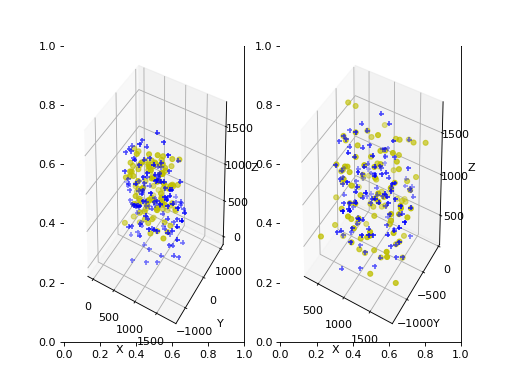

In [28]:
a=gR.test('3dPoints.ini')

In [29]:
a,b,c=gR._core.run_ini('3dPoints.ini')

loading scene./3dPoints_Data/c1.txt
loading ./3dPoints_Data/c2.txt
Elasped time is 0.318876981735 seconds


<IPython.core.display.Javascript object>


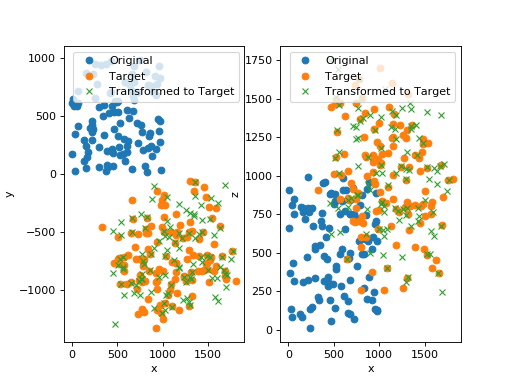

In [30]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(a[:,0], a[:,1],'o',label='Original')
plt.plot(b[:,0], b[:,1],'o',label='Target')
plt.plot(c[:,0], c[:,1],'x',label='Transformed to Target')
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.subplot(1,2,2)
plt.plot(a[:,0], a[:,2],'o',label='Original')
plt.plot(b[:,0], b[:,2],'o',label='Target')
plt.plot(c[:,0], c[:,2],'x',label='Transformed to Target')
plt.ylabel("z")
plt.xlabel("x")
plt.legend()

<IPython.core.display.Javascript object>


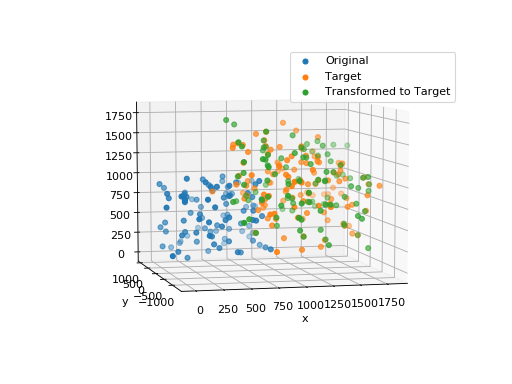

In [31]:
fig=plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(a[:,0], a[:,1],a[:,2],'o',label='Original')
ax.scatter(b[:,0], b[:,1],b[:,2],'o',label='Target')
ax.scatter(c[:,0], c[:,1],c[:,2],'o',label='Transformed to Target')
plt.ylabel("y")
plt.xlabel("x")
plt.legend()


In [26]:
model = AffineTransform()
model.estimate(cells_0["posArray"][:,0:2], cells_1["posArray"][:,0:2])

ValueError: operands could not be broadcast together with shapes (125,) (106,) 

In [ ]:
model_robust, inliers = ransac((src, dst), AffineTransform, min_samples=3,
                               residual_threshold=2, max_trials=100)
outliers = inliers == False

In [ ]:
cells_1["posArray"]